In [1]:

#importing the depedencies and accessing file
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import boxcox
from google.colab import drive
#for drive
drive.mount('/content/drive')
df=pd.read_csv('drive/MyDrive/DATAHAWK/CODE/data.csv')

#for  vscode
#df=pd.read_csv('data.csv')
print(df)
df1=df  # to maintian raw dataset
target=df['P_HABITABLE']

Mounted at /content/drive
          P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0       11 Com b       3.0  6165.86330        -476.74200         476.74200   
1       11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2       14 And b       3.0  1525.57440               NaN               NaN   
3       14 Her b       3.0  1481.07850         -47.67420          47.67420   
4     16 Cyg B b       3.0   565.73385         -25.42624          25.42624   
...          ...       ...         ...               ...               ...   
4043    K2-296 b       3.0         NaN               NaN               NaN   
4044    K2-296 c       3.0         NaN               NaN               NaN   
4045   GJ 1061 b       3.0     1.38000           0.15000           0.16000   
4046   GJ 1061 c       3.0     1.75000           0.23000           0.23000   
4047   GJ 1061 d       3.0     1.68000           0.24000           0.25000   

      P_RADIUS  P_RADIUS_ERROR_MIN  P

In [ ]:
# taking all columns which donot have string type

df= df.dropna(axis=1, how='all')
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

df=numeric_columns

statistics = {}
for col in df.columns:
    if df[col].notnull().any():  # Check if there are non-null values in the column
        statistics[col] = {
            'Range': df[col].max() - df[col].min(),
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Standard Deviation': df[col].std()
        }

print(statistics)

{'P_STATUS': {'Range': 0.0, 'Mean': 3.0, 'Median': 3.0, 'Standard Deviation': 0.0}, 'P_MASS': {'Range': 17668.039930320003, 'Mean': 798.3849203572346, 'Median': 273.33208, 'Standard Deviation': 1406.8086542573158}, 'P_MASS_ERROR_MIN': {'Range': 24965.66000001, 'Mean': -152.29223171666254, 'Median': -24.154928, 'Standard Deviation': 783.3663526324012}, 'P_MASS_ERROR_MAX': {'Range': 26630.808, 'Mean': 190.28969208662917, 'Median': 25.108412, 'Standard Deviation': 1082.0619758096484}, 'P_RADIUS': {'Range': 77.01270000000001, 'Mean': 4.191425871296591, 'Median': 2.33168, 'Standard Deviation': 4.776829779149984}, 'P_RADIUS_ERROR_MIN': {'Range': 55.0427, 'Mean': -0.48398988083735917, 'Median': -0.23541, 'Standard Deviation': 1.4090483986715039}, 'P_RADIUS_ERROR_MAX': {'Range': 68.91908, 'Mean': 0.6218674074074073, 'Median': 0.32509, 'Standard Deviation': 2.0075923675052363}, 'P_YEAR': {'Range': 30, 'Mean': 2014.2129446640315, 'Median': 2016.0, 'Standard Deviation': 3.7048389843656233}, 'P_PE

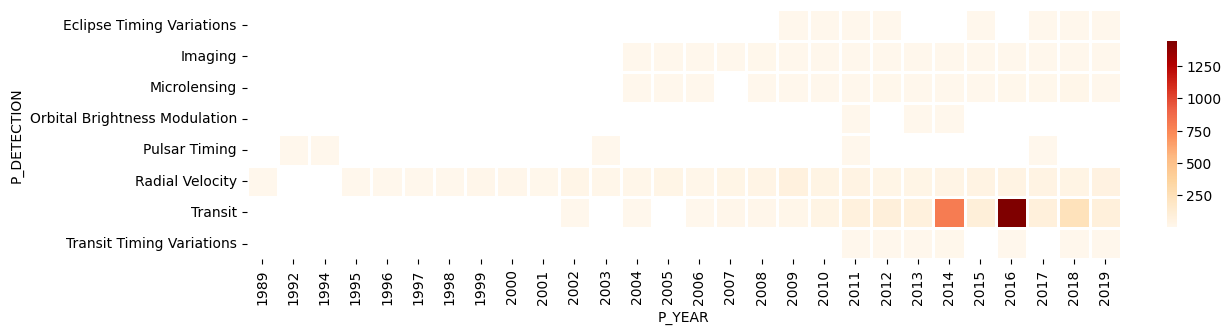

In [ ]:
#anaylizing different methods of extraction.

by_p_detec = (df1
            .groupby('P_DETECTION')
            .filter(lambda x : len(x) > 5)
            .groupby(['P_DETECTION', 'P_YEAR'])
            .size()
            .unstack()
           )

plt.figure(figsize=(12,12))
g = sns.heatmap(
    by_p_detec,
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=1
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5400\602099862.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoders[col].fit_transform(df2[col])


P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  P_RADIUS  \
0       0       3.0  6165.86330        -476.74200        476.742000  4.798394   
1       1       3.0  4684.78480        -794.57001        794.570010  4.798394   
2       2       3.0  1525.57440        -161.08447        217.207263  4.798394   
3       3       3.0  1481.07850         -47.67420         47.674200  4.798394   
4       4       3.0   565.73385         -25.42624         25.426240  4.798394   

   P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR  P_UPDATED  ...  \
0            8.647195           -2.129744    2007          0  ...   
1            8.647195           -2.129744    2009        146  ...   
2            8.647195           -2.129744    2008          0  ...   
3            8.647195           -2.129744    2002        146  ...   
4            8.647195           -2.129744    1996        146  ...   

   P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION  \
0              0            1            0  0.083813               24   
1              0            1            0  0.082414               83   
2              0            1            0  0.081917                0   
3              0            0            0  0.145241               39   
4              1            2            0  0.368627               30   

   S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST  \
0                   24                    5     12.082709  6165.86330   
1                   83                   42     12.229641  4684.78480   
2                    0                    2     12.848516  1525.57440   
3                   39                   34     12.865261  1481.07850   
4                   30                   75     13.421749   565.73385   

   P_SEMI_MAJOR_AXIS_EST  
0                   1.29  
1                   1.53  
2                   0.83  
3                   2.93  
4                   1.66  

[5 rows x 105 columns]

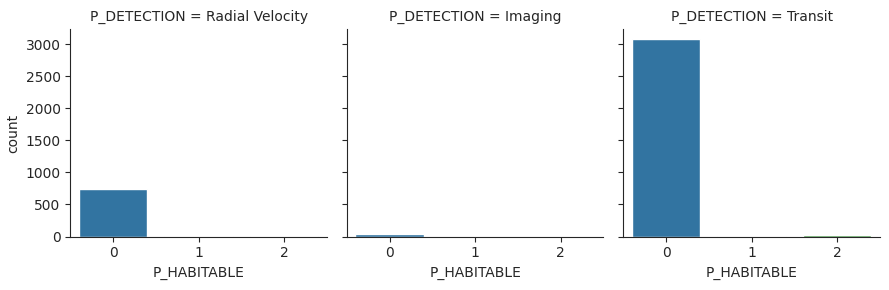

In [ ]:


# Set the style for the plot (ticks)
with sns.axes_style(style='ticks'):

    # Create a catplot with specific parameters
    g = sns.catplot(
        x="P_HABITABLE",           # Categorical variable on the x-axis
        col="P_DETECTION",         # Categorical variable for columns
        col_wrap=3,                # Number of columns in each row
        data=df1[df1['P_DETECTION'].isin(['Radial Velocity','Transit','Imaging'])],  # Filtered DataFrame
        kind="count",              # Type of plot (count plot)
        height=3.0,                # Height of each plot
        aspect=1.0                 # Aspect ratio of each plot
    )

#applying label encoding to df2 and replace missing value with mean
df2=df1
perc = 100.0
min_count =  int(((100-perc)/100)*df2.shape[0] + 1)
df2 = df2.dropna( axis=1, thresh=min_count)
from sklearn.preprocessing import LabelEncoder

#Define a dictionaryfor encoded labels
encoders = {}
p=LabelEncoder()
#Encode each member of encoders dictionary
for col in df2.select_dtypes(include = ['object']).columns:
    encoders[col] = LabelEncoder()
    #Fit the encoded labels into dataset
    if col=='S_TYPE_TEMP':
        p=encoders[col]
    df2[col] = encoders[col].fit_transform(df2[col])


#Impute in the missing data with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Deep copy current dataset into Mice_temp_data
df2 = df2.copy(deep = True)

#Set the estimator to estimate features based on other features
mice_imputer = IterativeImputer()

#Fit-transform the imputed columns in the dataset
df2.iloc[:, :] = mice_imputer.fit_transform(df2)
df2.head()


In [ ]:
#Resolve the imbalance
from imblearn.combine import SMOTEENN

#Split the dataset
X, y = df2.drop(['P_HABITABLE'], axis = 1), df2.P_HABITABLE

#Apply sampling method and fit the resampled into data
smt = SMOTEENN(random_state=0)
X, y = smt.fit_resample(X, y)


#The distribution after applying SMOTEENN
from collections import Counter
counter = Counter(y)
for class_label, example_num in counter.items():
    percentage = example_num / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label, example_num, percentage))
percent_null = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
percent_null

Class=0, n=3830 (32.909%)
Class=1, n=3990 (34.284%)
Class=2, n=3818 (32.806%)


P_GEO_ALBEDO_ERROR_MIN    99.876482
P_GEO_ALBEDO_ERROR_MAX    99.876482
P_TEMP_MEASURED           99.876482
P_TPERI_ERROR_MAX         88.339921
P_TPERI_ERROR_MIN         88.339921
                            ...    
P_HABZONE_CON              0.000000
P_YEAR                     0.000000
P_RADIUS_EST               0.000000
P_MASS_EST                 0.000000
P_STATUS                   0.000000
Length: 90, dtype: float64

In [ ]:
X['P_HABITABLE']=y
df2=X

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5400\1594413791.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['P_HABITABLE']=y


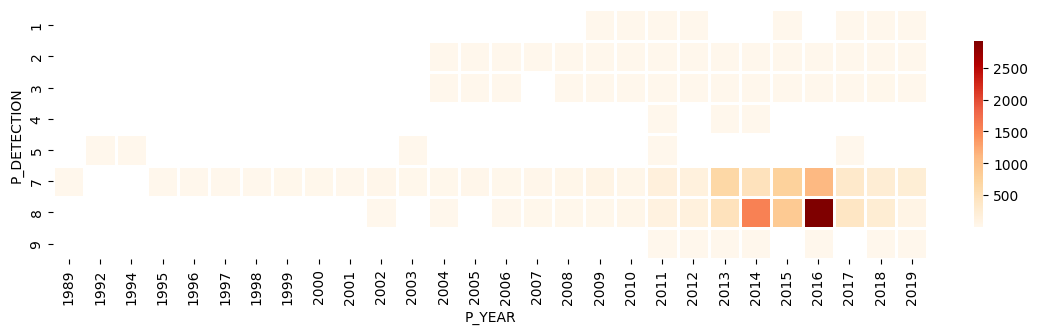

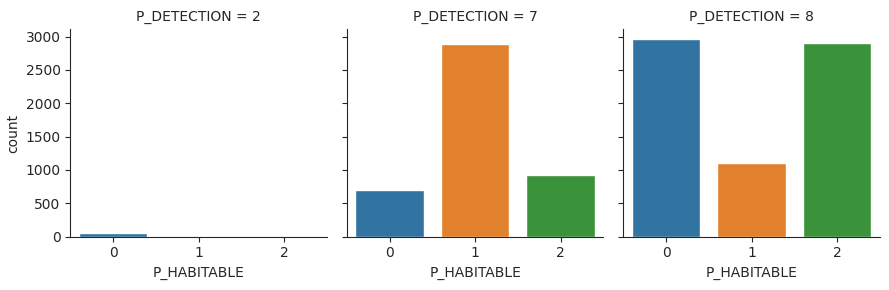

In [ ]:

by_p_detec = (df2
            .groupby('P_DETECTION')
            .filter(lambda x : len(x) > 5)
            .groupby(['P_DETECTION', 'P_YEAR'])
            .size()
            .unstack()
           )

plt.figure(figsize=(12,12))
g = sns.heatmap(
    by_p_detec,
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=1
)

# Set the style for the plot (ticks)
with sns.axes_style(style='ticks'):

    # Create a catplot with specific parameters
    g = sns.catplot(
        x="P_HABITABLE",           # Categorical variable on the x-axis
        col="P_DETECTION",         # Categorical variable for columns
        col_wrap=3,                # Number of columns in each row
        data=df2[df2['P_DETECTION'].isin([8,7,2])],  # Filtered DataFrame
        kind="count",              # Type of plot (count plot)
        height=3.0,                # Height of each plot
        aspect=1.0                 # Aspect ratio of each plot
    )

Column: P_STATUS, Data Type: float64
Range: 0.0, Mean: 3.0, Median: 3.0, Standard Deviation: 0.0

Column: P_MASS, Data Type: float64
Range: 17668.059, Mean: 315.1727032437898, Median: 0.0, Standard Deviation: 966.0829575923801

Column: P_MASS_ERROR_MIN, Data Type: float64
Range: 24965.66000001, Mean: -55.19088535779248, Median: 0.0, Standard Deviation: 477.13299360829404

Column: P_MASS_ERROR_MAX, Data Type: float64
Range: 26630.808, Mean: 68.9612100521455, Median: 0.0, Standard Deviation: 657.6510703292697

Column: P_RADIUS, Data Type: float64
Range: 77.349, Mean: 3.2502188265810275, Median: 1.88328, Standard Deviation: 4.555523533485919

Column: P_RADIUS_ERROR_MIN, Data Type: float64
Range: 55.0427, Mean: -0.3712422381422925, Median: -0.16815, Standard Deviation: 1.2508629536983042

Column: P_RADIUS_ERROR_MAX, Data Type: float64
Range: 68.91908, Mean: 0.47700056818181813, Median: 0.21299, Standard Deviation: 1.7777534802475201

Column: P_YEAR, Data Type: int64
Range: 30.0, Mean: 2014

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5400\3061814648.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2['Fe to H Ratio']=np.power(df2['S_METALLICITY']-4.33,10)


0        5.040325e+06
1        2.426010e+06
2        3.973397e+06
3        8.567629e+05
4        2.015017e+06
             ...     
11633    2.471435e+06
11634    2.509346e+06
11635    4.188230e+06
11636    2.194521e+06
11637    3.016657e+06
Name: Fe to H Ratio, Length: 11638, dtype: float64

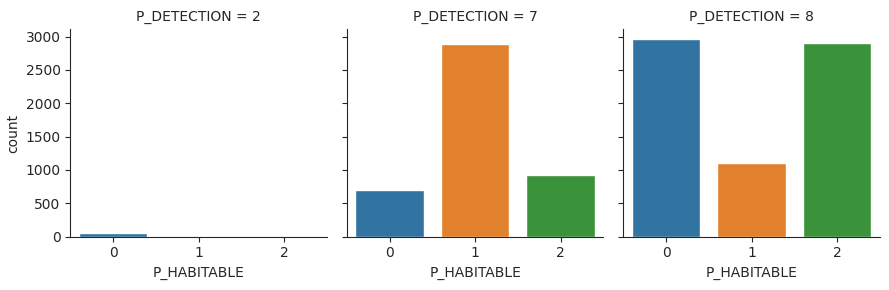

In [ ]:
# Set the style for the plot (ticks)
with sns.axes_style(style='ticks'):

    # Create a catplot with specific parameters
    g = sns.catplot(
        x="P_HABITABLE",           # Categorical variable on the x-axis
        col="P_DETECTION",         # Categorical variable for columns
        col_wrap=3,                # Number of columns in each row
        data=df2[df2['P_DETECTION'].isin([8,7,2])],  # Filtered DataFrame
        kind="count",              # Type of plot (count plot)
        height=3.0,                # Height of each plot
        aspect=1.0                 # Aspect ratio of each plot
    )
df= df.dropna(axis=1, how='all')
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns = numeric_columns.fillna(0)
df_num=numeric_columns
statistics = {
    'Range': df_num.max() - df_num.min(),
    'Mean': df_num.mean(),
    'Median': df_num.median(),
    'Standard Deviation': df_num.std()
}
data_types = df_num.dtypes

for column in df_num.columns:
    print(f"Column: {column}, Data Type: {data_types[column]}")
    print(f"Range: {statistics['Range'][column]}, Mean: {statistics['Mean'][column]}, Median: {statistics['Median'][column]}, Standard Deviation: {statistics['Standard Deviation'][column]}")
    print()

#new column for Fe/H ratio
df2['Fe to H Ratio']=np.power(df2['S_METALLICITY']-4.33,10)
df2['Fe to H Ratio']

          P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0       11 Com b       3.0  6165.86330        -476.74200         476.74200   
1       11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2       14 And b       3.0  1525.57440               NaN               NaN   
3       14 Her b       3.0  1481.07850         -47.67420          47.67420   
4     16 Cyg B b       3.0   565.73385         -25.42624          25.42624   
...          ...       ...         ...               ...               ...   
4043    K2-296 b       3.0         NaN               NaN               NaN   
4044    K2-296 c       3.0         NaN               NaN               NaN   
4045   GJ 1061 b       3.0     1.38000           0.15000           0.16000   
4046   GJ 1061 c       3.0     1.75000           0.23000           0.23000   
4047   GJ 1061 d       3.0     1.68000           0.24000           0.25000   

      P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR 

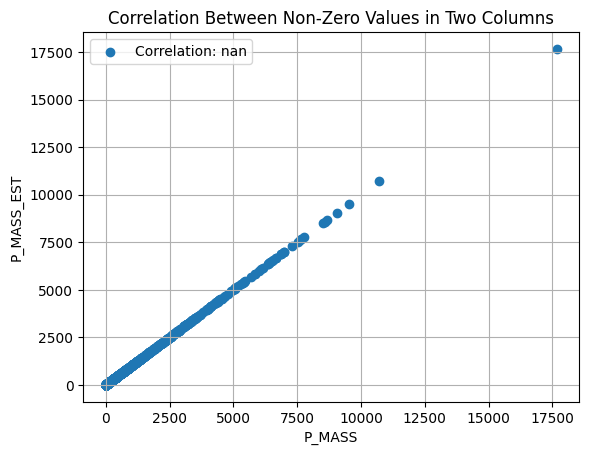

In [ ]:
# Filter rows where both columns are non-zero
import numpy as np
non_zero_rows = df1[(df1['P_MASS'] != 0) & (df1['P_MASS_EST'] != 0)]
print(non_zero_rows)
# Extract the two columns of interest
column1 = non_zero_rows['P_MASS']
column2 = non_zero_rows['P_MASS_EST']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(column1, column2)[0, 1]

# Create a scatter plot
plt.scatter(column1, column2, label=f'Correlation: {correlation_coefficient:.2f}')
plt.xlabel('P_MASS')
plt.ylabel('P_MASS_EST')
plt.legend()
plt.title('Correlation Between Non-Zero Values in Two Columns')
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
G=6.67408e10-11
df1['P_ESCAPE_CAL']=np.sqrt(df1['P_MASS']*G*np.sqrt(2)/df1['P_RADIUS_EST'])

In [ ]:
non_zero_rows = df1[(df1['P_TEMP_EQUIL'] != 0) & (df1['P_ESCAPE'] != 0)]
# Extract the two columns of interest
column1 = non_zero_rows['P_TEMP_EQUIL']
column2 = non_zero_rows['P_ESCAPE']

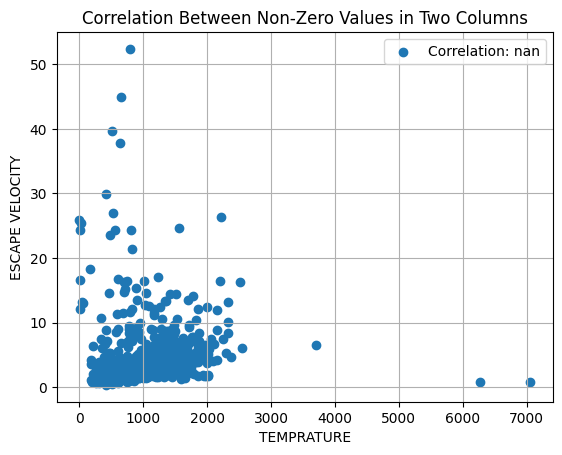

In [ ]:
correlation_coefficient = np.corrcoef(column1, column2)[0, 1]

# Create a scatter plot
plt.scatter(column1, column2, label=f'Correlation: {correlation_coefficient:.2f}')
plt.xlabel('TEMPRATURE')
plt.ylabel('ESCAPE VELOCITY')
plt.legend()
plt.title('Correlation Between Non-Zero Values in Two Columns')
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
#2.4
df_no_null_col = df2[~df2['S_TYPE_TEMP'].isnull()]
unique_values = df_no_null_col['S_TYPE_TEMP'].unique()
dict={
    '1':'B',
    '2':'F',
    '3':'G',
    '4':'K',
    '5':'M',
    '6':'O',
    '0':'A'
}

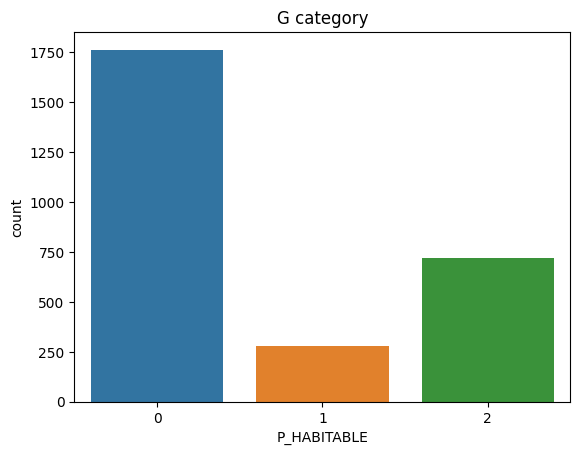

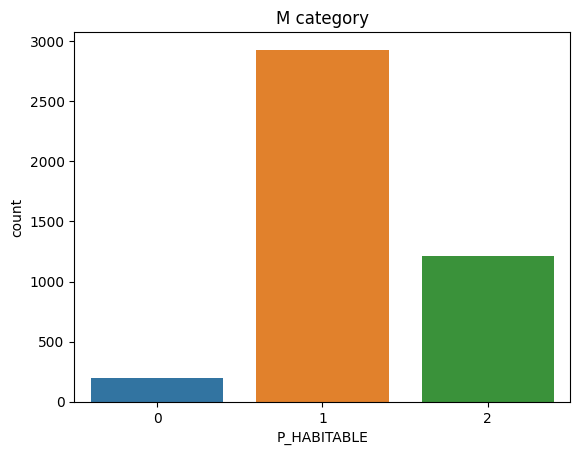

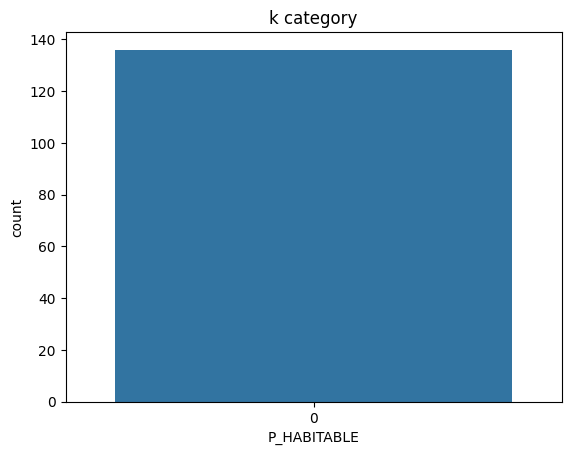

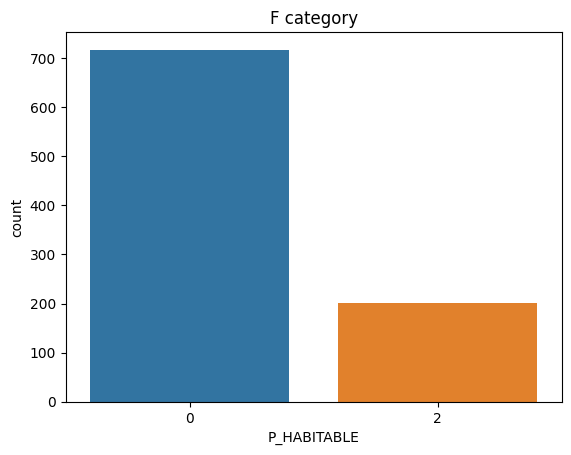

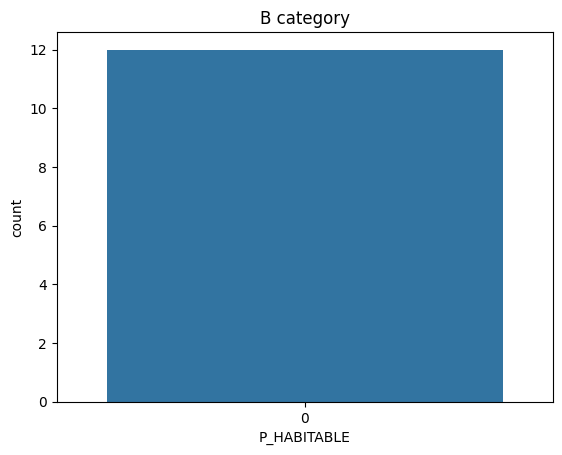

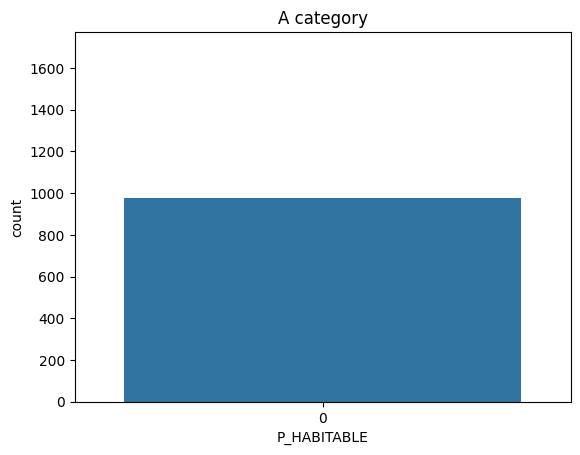

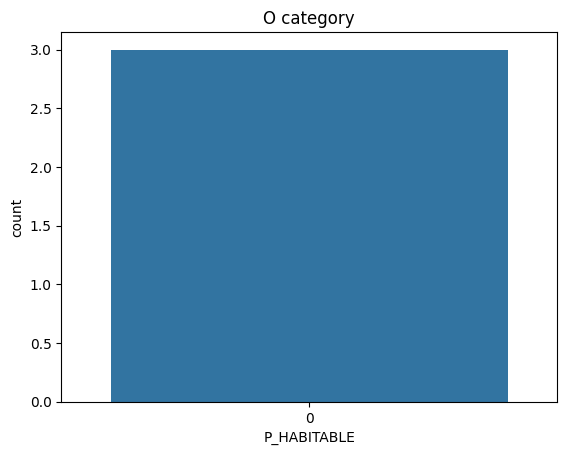

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in unique_values:
    c=df_no_null_col[df_no_null_col['S_TYPE_TEMP']==i]
    j=i.astype(str)
    plt.title(dict.get(j,'k')+' category')
    sns.countplot(data=c,x="P_HABITABLE")
    plt.figure(i)


<Axes: >

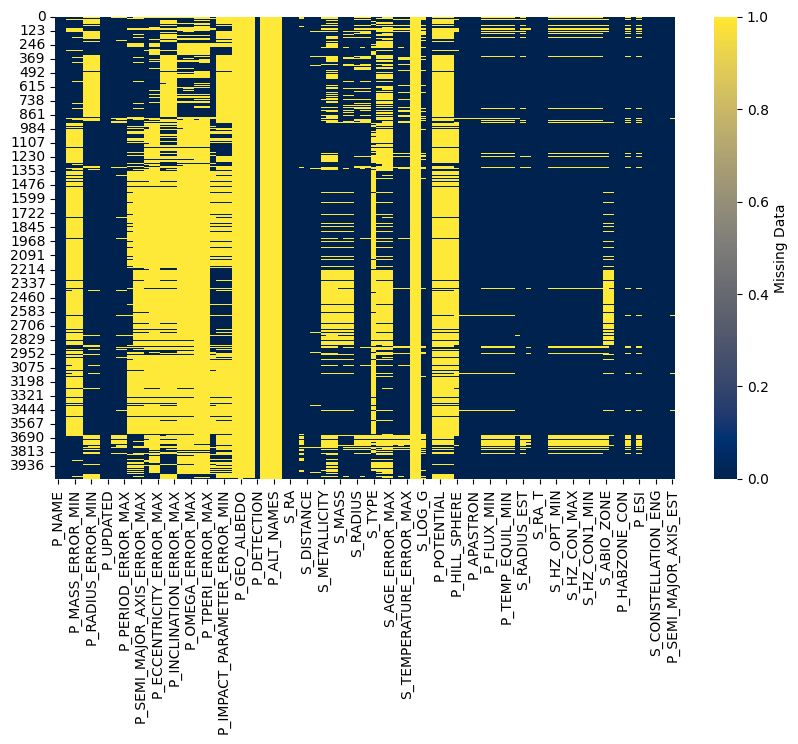

In [ ]:

#3
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),
            cmap="cividis",
            cbar_kws={'label': 'Missing Data'})

In [ ]:
percent_null = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
percent_null
#we removed  col with 100% null values

P_GEO_ALBEDO_ERROR_MIN    99.876482
P_GEO_ALBEDO_ERROR_MAX    99.876482
P_TEMP_MEASURED           99.876482
P_TPERI_ERROR_MAX         88.339921
P_TPERI_ERROR_MIN         88.339921
                            ...    
P_HABZONE_CON              0.000000
P_YEAR                     0.000000
P_RADIUS_EST               0.000000
P_MASS_EST                 0.000000
P_STATUS                   0.000000
Length: 90, dtype: float64

In [ ]:
perc = 40.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [ ]:
#Convert categorical values to numeric values
from sklearn.preprocessing import LabelEncoder

#Define a dictionaryfor encoded labels
encoders = {}

#Encode each member of encoders dictionary
for col in df.select_dtypes(include = ['object']).columns:
    encoders[col] = LabelEncoder()
    #Fit the encoded labels into dataset
    df[col] = encoders[col].fit_transform(df[col])

In [ ]:
#Impute in the missing data with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Deep copy current dataset into Mice_temp_data
df = df.copy(deep = True)

#Set the estimator to estimate features based on other features
mice_imputer = IterativeImputer()

#Fit-transform the imputed columns in the dataset
df.iloc[:, :] = mice_imputer.fit_transform(df)
df.head()

P_NAME  P_STATUS  P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   
0       0       3.0  4.798394            8.419074           -1.911632    2007  \
1       1       3.0  4.798394            8.419074           -1.911632    2009   
2       2       3.0  4.798394            8.419074           -1.911632    2008   
3       3       3.0  4.798394            8.419074           -1.911632    2002   
4       4       3.0  4.798394            8.419074           -1.911632    1996   

   P_UPDATED    P_PERIOD  P_PERIOD_ERROR_MIN  P_PERIOD_ERROR_MAX  ...   
0          0   326.03000               -0.32                0.32  ...  \
1        146   516.21997               -3.20                3.20  ...   
2          0   185.84000               -0.23                0.23  ...   
3        146  1773.40000               -2.50                2.50  ...   
4        146   798.50000               -1.00                1.00  ...   

   P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION   
0              0            1            0  0.083813               24  \
1              0            1            0  0.082414               83   
2              0            1            0  0.081917                0   
3              0            0            0  0.145241               39   
4              1            2            0  0.368627               30   

   S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST   
0                   24                    5     12.082709  6165.86330  \
1                   83                   42     12.229641  4684.78480   
2                    0                    2     12.848516  1525.57440   
3                   39                   34     12.865261  1481.07850   
4                   30                   75     13.421749   565.73385   

   P_SEMI_MAJOR_AXIS_EST  
0                   1.29  
1                   1.53  
2                   0.83  
3                   2.93  
4                   1.66  

[5 rows x 71 columns]

In [ ]:
#Class distribution before sampling
from collections import Counter
counter_ = Counter(df['P_HABITABLE'])
for class_label_, example_num_ in counter_.items():
    percentage_ = example_num_ / len(df['P_HABITABLE']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label_, example_num_, percentage_))

Class=0, n=3993 (98.641%)
Class=2, n=34 (0.840%)
Class=1, n=21 (0.519%)


In [ ]:
#Resolve the imbalance
from imblearn.combine import SMOTEENN

#Split the dataset
X, y = df.drop(['P_HABITABLE'], axis = 1), df.P_HABITABLE

#Apply sampling method and fit the resampled into data
smt = SMOTEENN(random_state=0)
X, y = smt.fit_resample(X, y)

#The distribution after applying SMOTEENN
from collections import Counter
counter = Counter(y)
for class_label, example_num in counter.items():
    percentage = example_num / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label, example_num, percentage))

Class=0, n=3843 (32.925%)
Class=1, n=3993 (34.210%)
Class=2, n=3836 (32.865%)


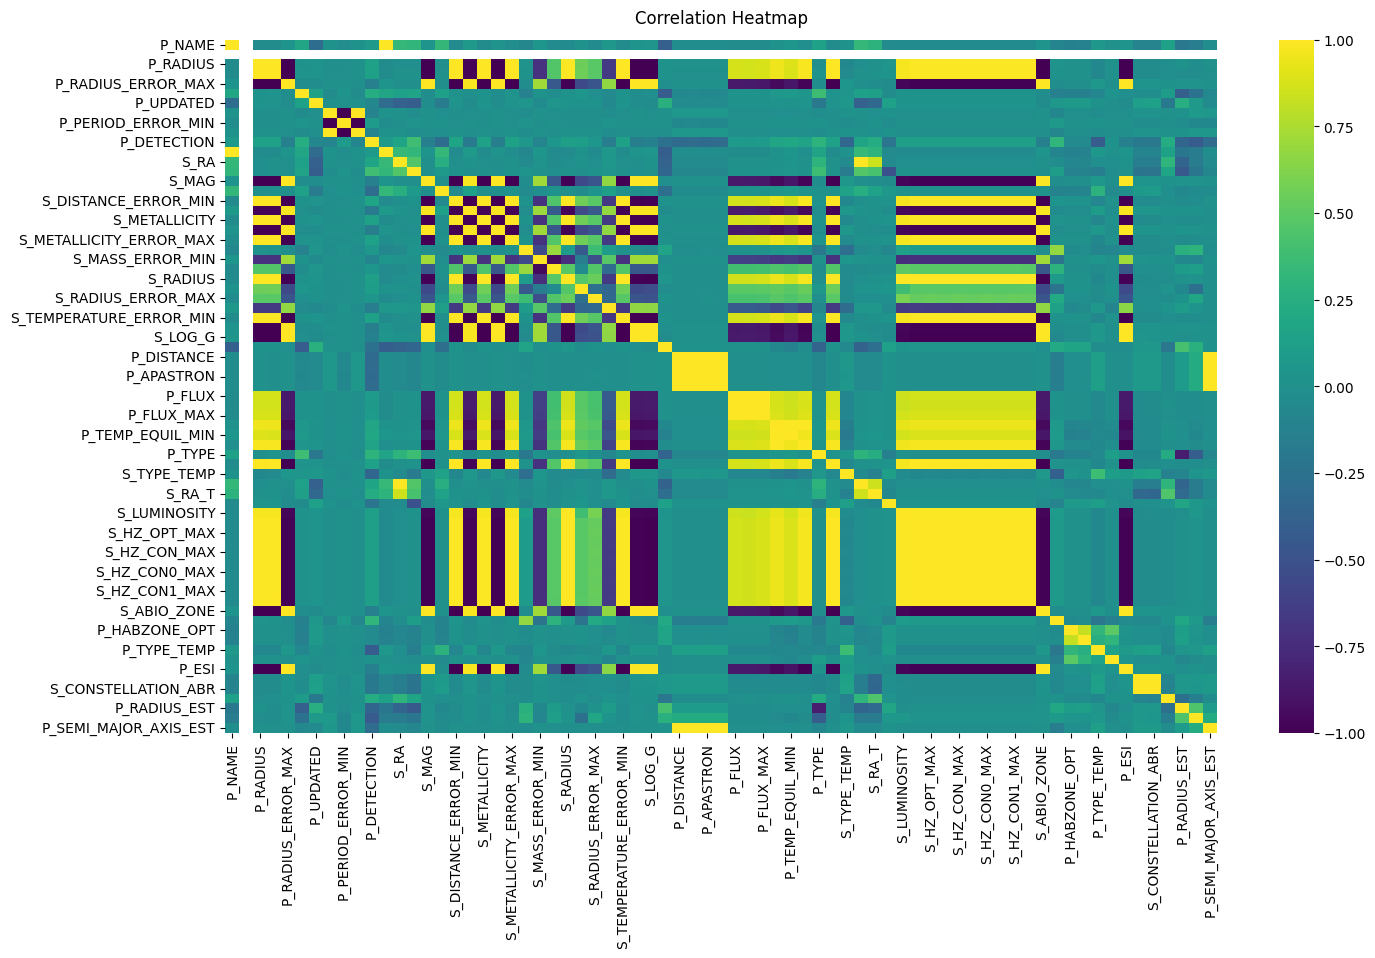

In [ ]:
plt.figure(figsize=(16,9))

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=False, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
df = df.drop(columns=['P_DISTANCE', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MAX', 'P_FLUX_MIN',
                      'P_TEMP_EQUIL_MAX', 'P_TEMP_EQUIL_MIN','S_RA','S_DEC','S_RA_H','S_RA_T','S_DEC_T', 'S_RADIUS_EST', 'S_HZ_OPT_MIN',
                      'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX','S_HZ_CON0_MIN', 'S_HZ_CON0_MAX',
                      'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE'])

<Axes: >

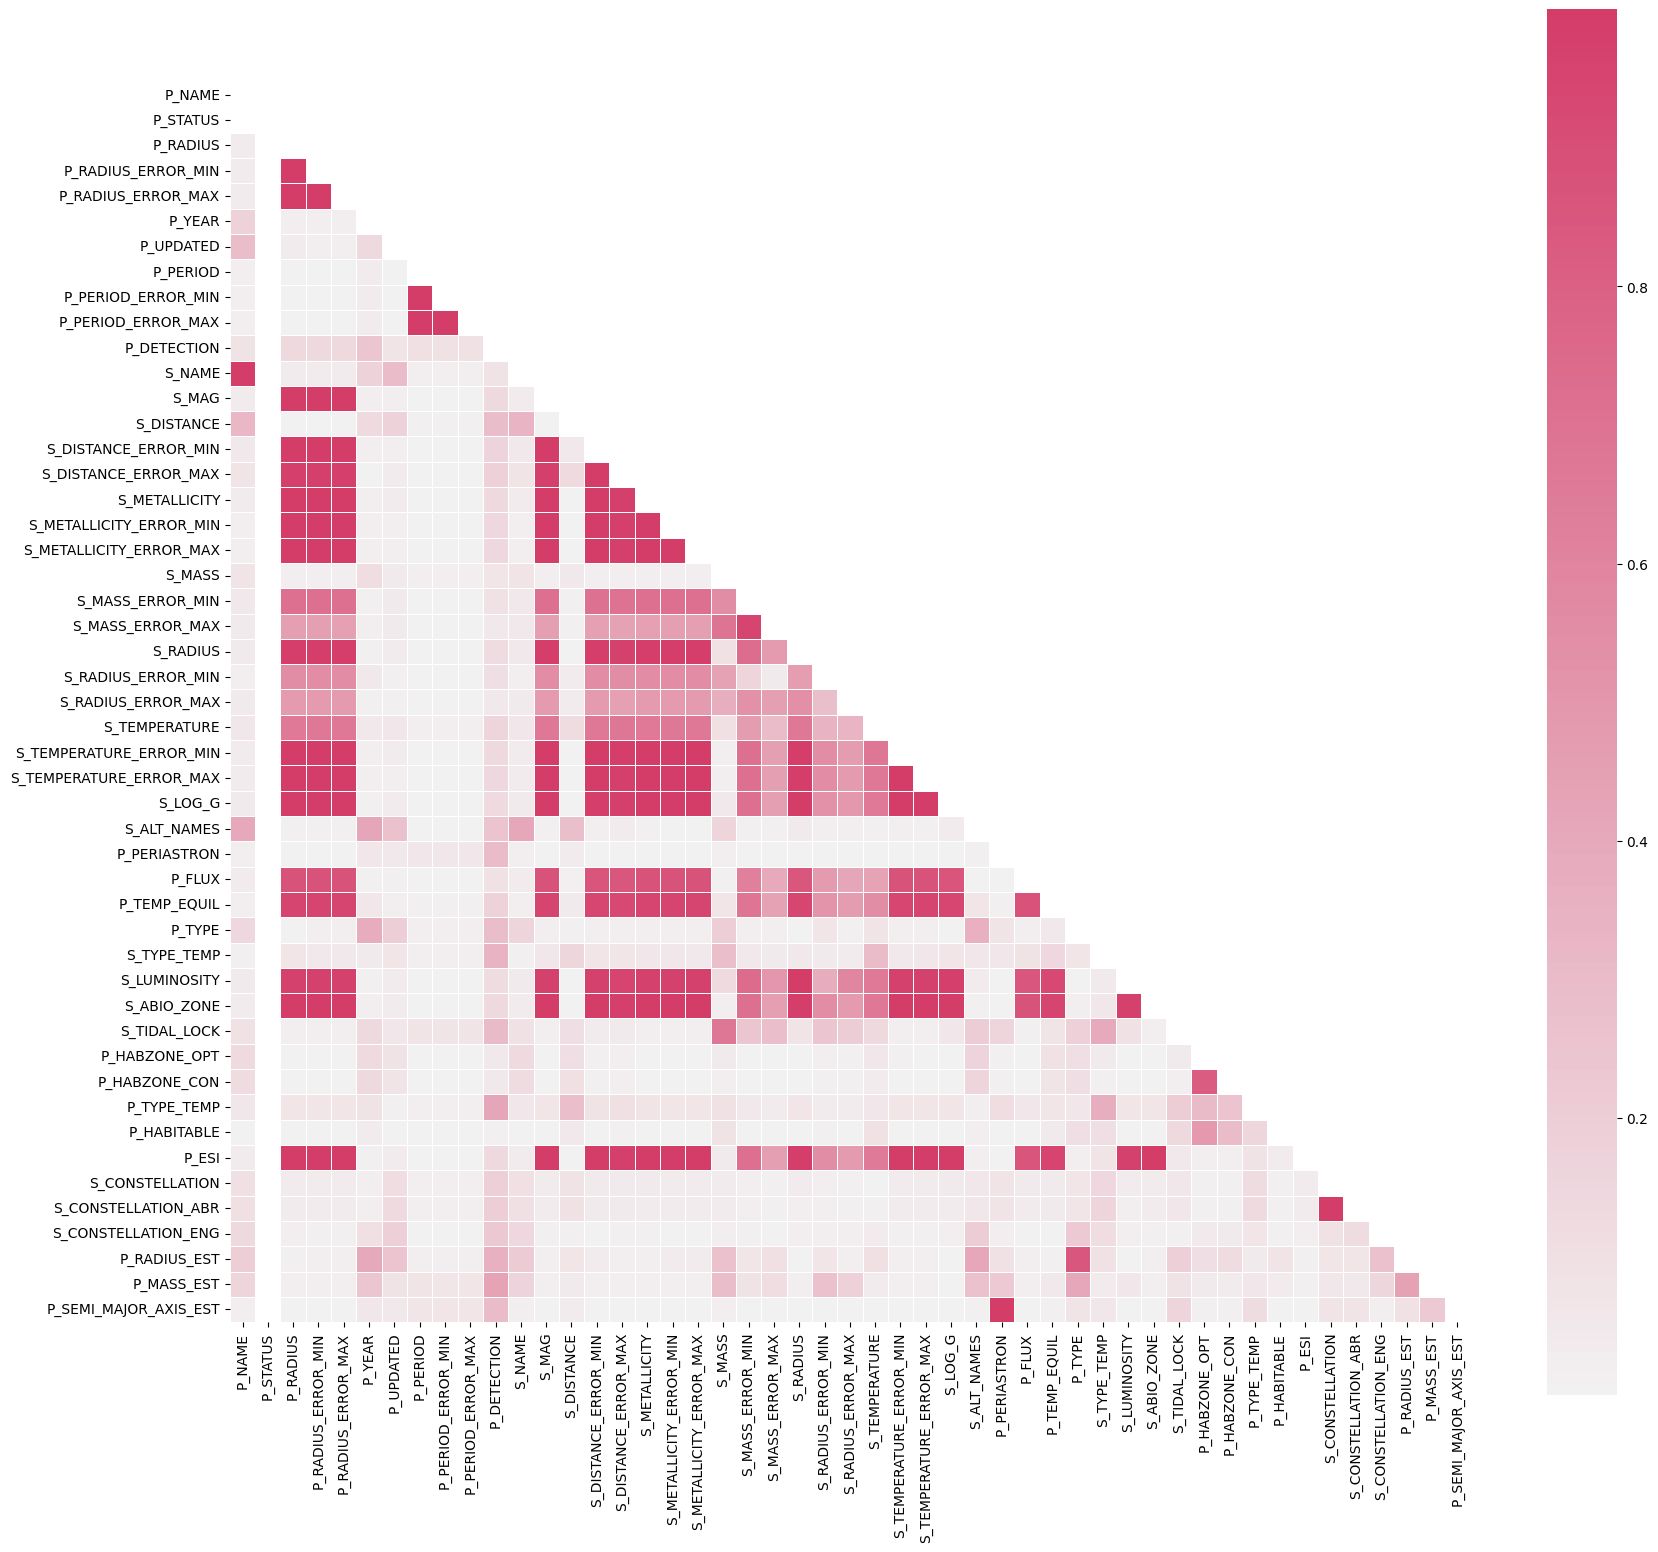

In [ ]:
#Correlation Analysis
correlation_mat = df.corr().abs()
mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = False, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

In [2]:
#Feature Selection
#Split dataset into feature matrix and target tuple
feature_mat = df.drop('P_HABITABLE', axis = 1)
target = df['P_HABITABLE']

fig1 = px.density_heatmap(df1, x='S_MAG', y='S_LOG_G', z='P_HABITABLE')
fig2 = px.density_heatmap(df1,x='P_TYPE',y='P_TYPE_TEMP',z='P_HABITABLE')
fig3 = px.density_heatmap(df1,x='P_SEMI_MAJOR_AXIS_EST',y='S_TYPE_TEMP',z='P_HABITABLE')

fig1.show()
fig2.show()
fig3.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#Use split data: feature_mat and target
estimator = rf(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

Status:  [False False  True False False False False  True False False False False
 False False False False False False False False False False  True False
 False False False False False False False  True  True  True False  True
 False False  True False  True  True False False False  True  True  True]
['P_RADIUS', 'P_PERIOD', 'S_RADIUS', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'S_LUMINOSITY', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_ESI', 'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST']


In [ ]:
#Feature Selection using AdaBoost
from sklearn.ensemble import AdaBoostRegressor as Ada

#Use split data: feature_mat and target
estimator = Ada(random_state = 0, n_estimators = 50)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

Status:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False  True False  True False  True
 False False  True False False  True False False False False  True False]
['S_LOG_G', 'P_FLUX', 'P_TYPE', 'S_LUMINOSITY', 'P_HABZONE_OPT', 'P_ESI', 'P_MASS_EST']


In [ ]:
#Feature Selection using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier as et

#Use split data: feature_mat and target
estimator = et(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

Status:  [False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False  True False False
 False False  True  True  True  True False False False  True  True False]
['P_RADIUS', 'S_TEMPERATURE', 'P_TYPE', 'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_ESI', 'P_RADIUS_EST', 'P_MASS_EST']


In [ ]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

#The feature_mat has to consist of only the features
#we have selected in Feature Selection phase
feature_mat = df[['P_PERIOD', 'P_FLUX', 'P_TEMP_EQUIL','P_TYPE', 'P_HABZONE_OPT','P_RADIUS_EST', 'P_MASS_EST', 'S_TYPE_TEMP']]

#The target column to test with
target = df['P_HABITABLE']

#Split the feature_mat and target into training and testing sets
X, X_test, y, y_test = train_test_split(feature_mat, target,\
test_size = 0.33, random_state = 42)

print(f"X_train dimentions: {X.shape}")
print(f"X_test dimentions: {X_test.shape}")
print(f"y_train dimentions: {y.shape}")
print(f"y_test dimentions: {y_test.shape}")

X_train dimentions: (2712, 8)
X_test dimentions: (1336, 8)
y_train dimentions: (2712,)
y_test dimentions: (1336,)


In [ ]:
feature_mat.sample(5)

P_PERIOD       P_FLUX  P_TEMP_EQUIL  P_TYPE  P_HABZONE_OPT   
3535  38.985300    17.850930     523.23267       0              0  \
2634  56.475420     9.923264     452.17708       2              0   
1532  11.555623    73.251571     745.33093       4              0   
3543   3.021669  1091.720100    1464.44390       4              0   
1323  86.647661    11.451855     399.82197       0              0   

      P_RADIUS_EST  P_MASS_EST  S_TYPE_TEMP  
3535       8.08241   29.901259            3  
2634       3.38542   11.383095            3  
1532       1.97296    4.551323            3  
3543       1.77118    3.789541            2  
1323      10.53740  460.850600            3

In [ ]:
X['P_PERIOD'].describe()

count    2.712000e+03
mean     3.215338e+03
std      1.405840e+05
min      9.070629e-02
25%      4.804968e+00
50%      1.273915e+01
75%      4.848078e+01
max      7.300000e+06
Name: P_PERIOD, dtype: float64

In [ ]:
cat_cols = ['P_TYPE', 'P_HABZONE_OPT', 'S_TYPE_TEMP']
cont_cols = [x for x in feature_mat.columns if x not in cat_cols]

In [ ]:
# It is evident that the data is highly skewed
for cols in cont_cols:
    print(f'The skewness of {cols} is {feature_mat[cols].skew()}')

The skewness of P_PERIOD is 63.031664619952174
The skewness of P_FLUX is -23.72494775306953
The skewness of P_TEMP_EQUIL is -38.10893059226729
The skewness of P_RADIUS_EST is 1.5454620523061076
The skewness of P_MASS_EST is 5.79720039870974


/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15

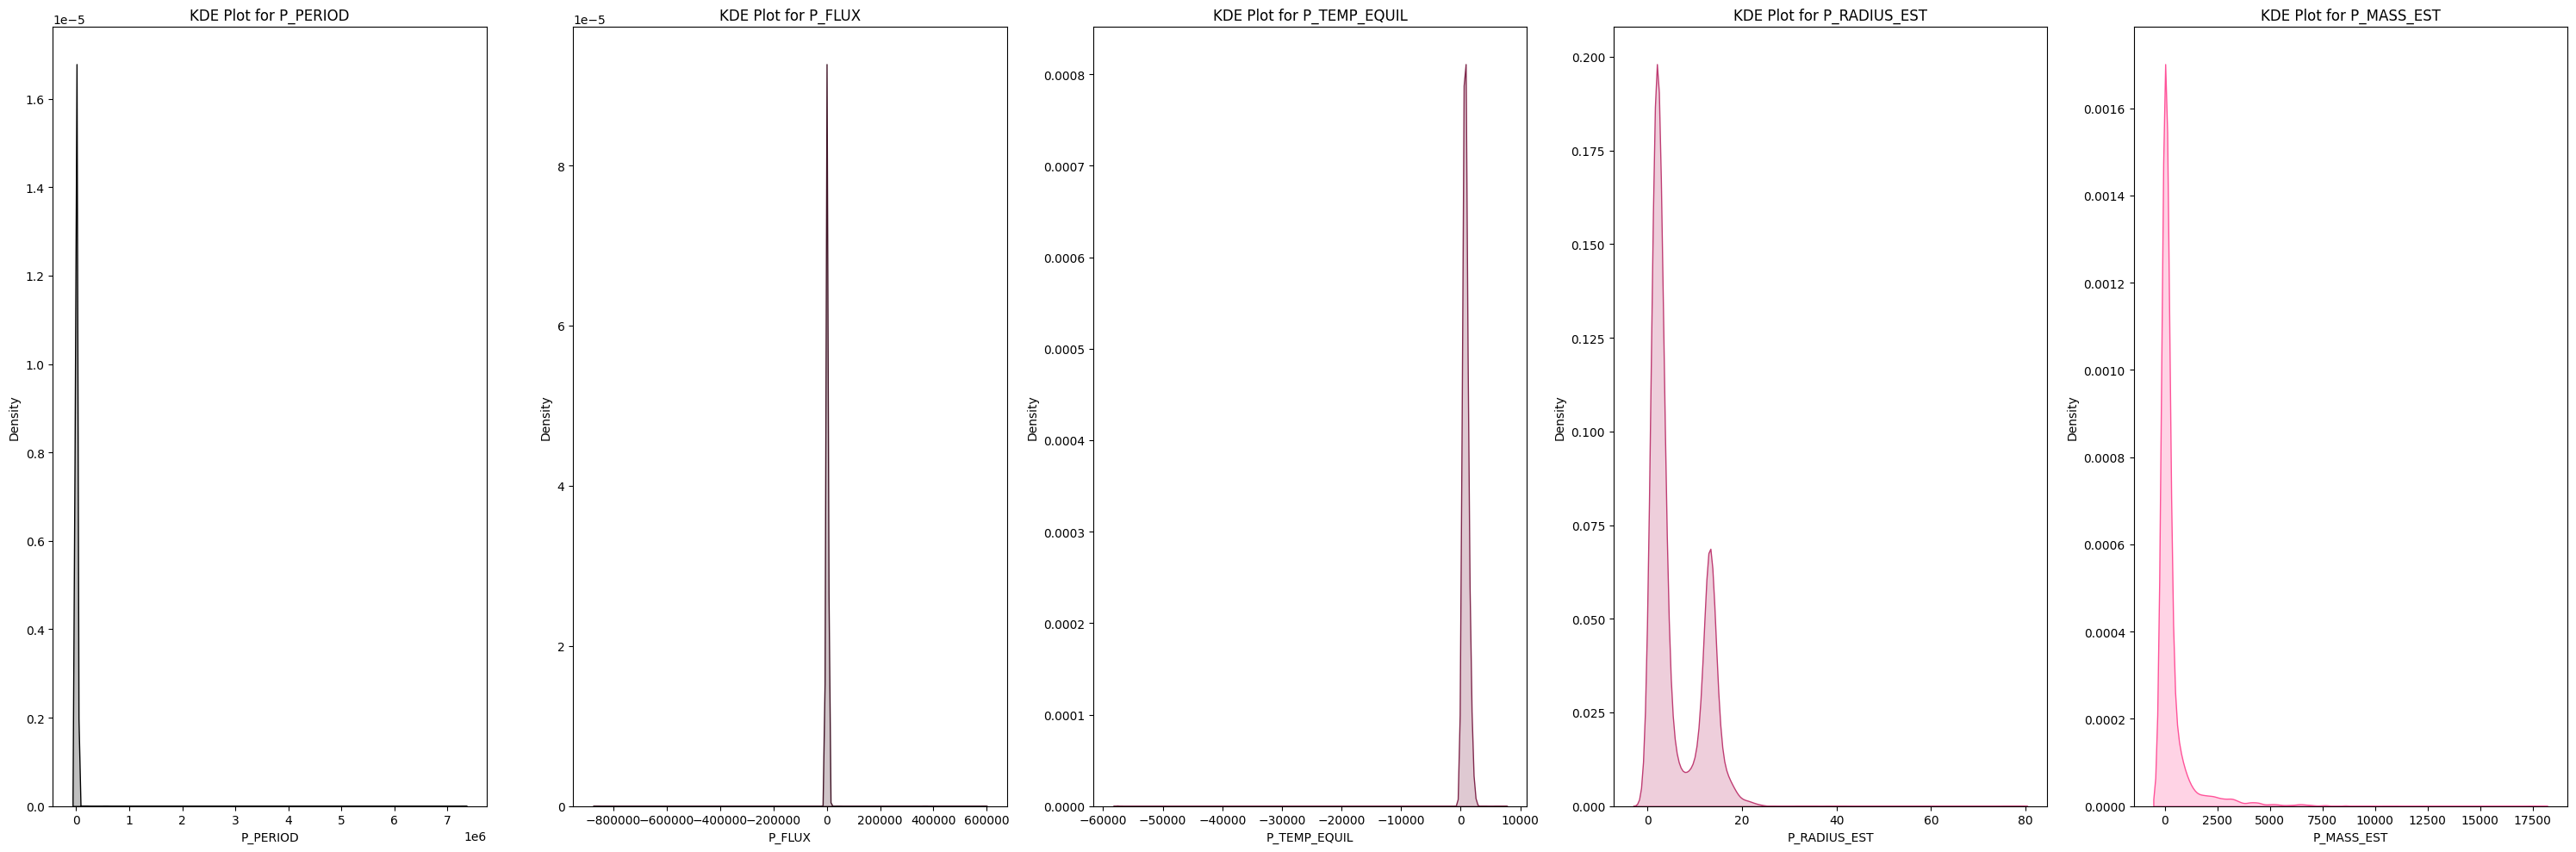

In [ ]:
# distribution plot for different features
fig, axes = plt.subplots(nrows=1, ncols=len(cont_cols), figsize=(30, 10))

# Iterate through each feature and create a KDE plot
for i, feature in enumerate(cont_cols):
    sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
    axes[i].set_title(f'KDE Plot for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
for i in feature_mat.columns:
    print(any(x<0 for x in feature_mat[i]))

False
True
True
False
False
False
False
False


In [ ]:
# since the data contains negative values, can't apply techniques like boxcox and log transform

In [ ]:
#from scipy.stats import yeojohnson
transformed_data = np.power(feature_mat[cont_cols], 2)
feature_mat[cont_cols] = pd.DataFrame(transformed_data, columns= cont_cols)

/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3228668264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_mat[cont_cols] = pd.DataFrame(transformed_data, columns= cont_cols)


/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15

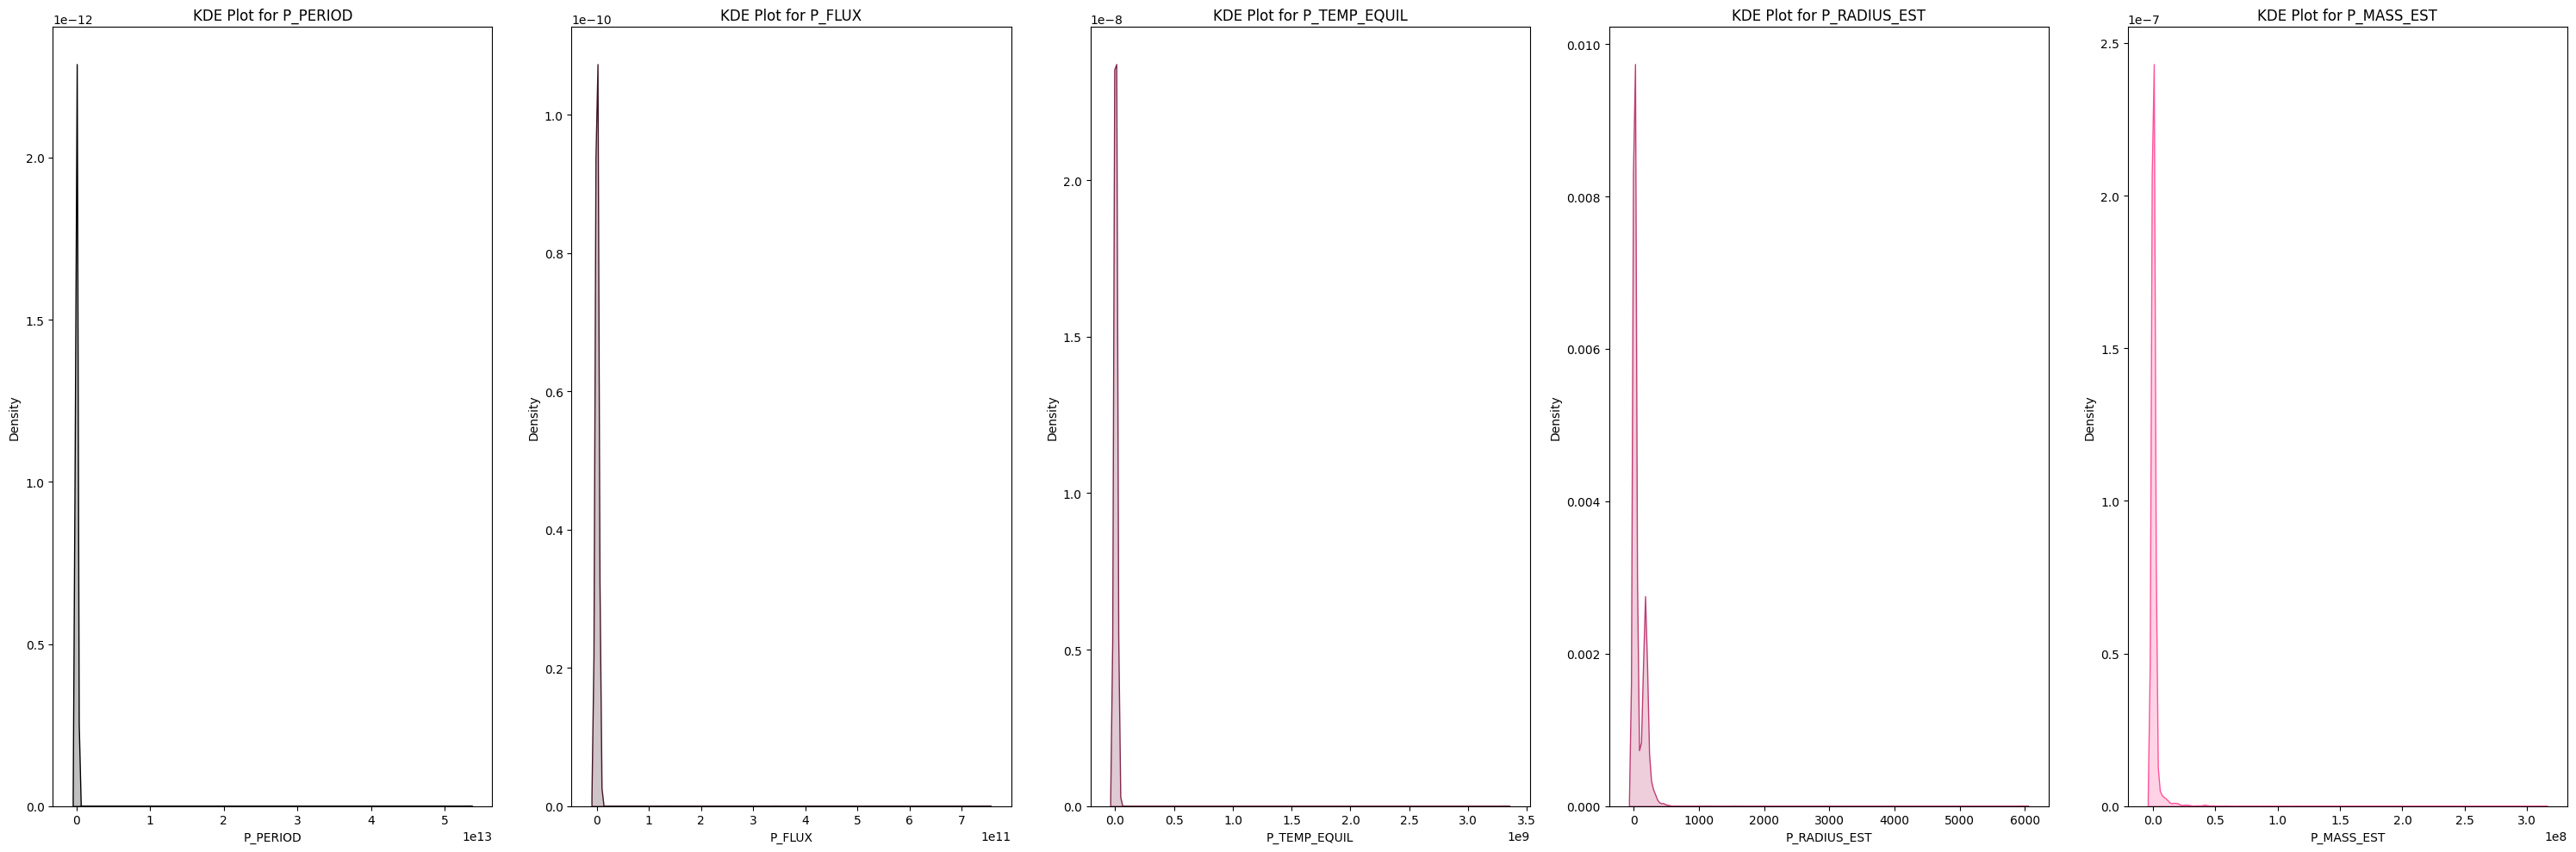

In [ ]:
# distribution plot for different features
fig, axes = plt.subplots(nrows=1, ncols=len(cont_cols), figsize=(30, 10))

# Iterate through each feature and create a KDE plot
for i, feature in enumerate(cont_cols):
    sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
    axes[i].set_title(f'KDE Plot for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
# It is evident that the data is highly skewed
for cols in cont_cols:
    print(f'The skewness of {cols} is {feature_mat[cols].skew()}')

The skewness of P_PERIOD is 63.62067622763385
The skewness of P_FLUX is 39.73170391939071
The skewness of P_TEMP_EQUIL is 44.95102827195601
The skewness of P_RADIUS_EST is 24.084391681229103
The skewness of P_MASS_EST is 23.405837686833937


In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
feature_mat[cont_cols] = power.fit_transform(feature_mat[cont_cols])

/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3605999672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_mat[cont_cols] = power.fit_transform(feature_mat[cont_cols])


/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_629/3987360015.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15

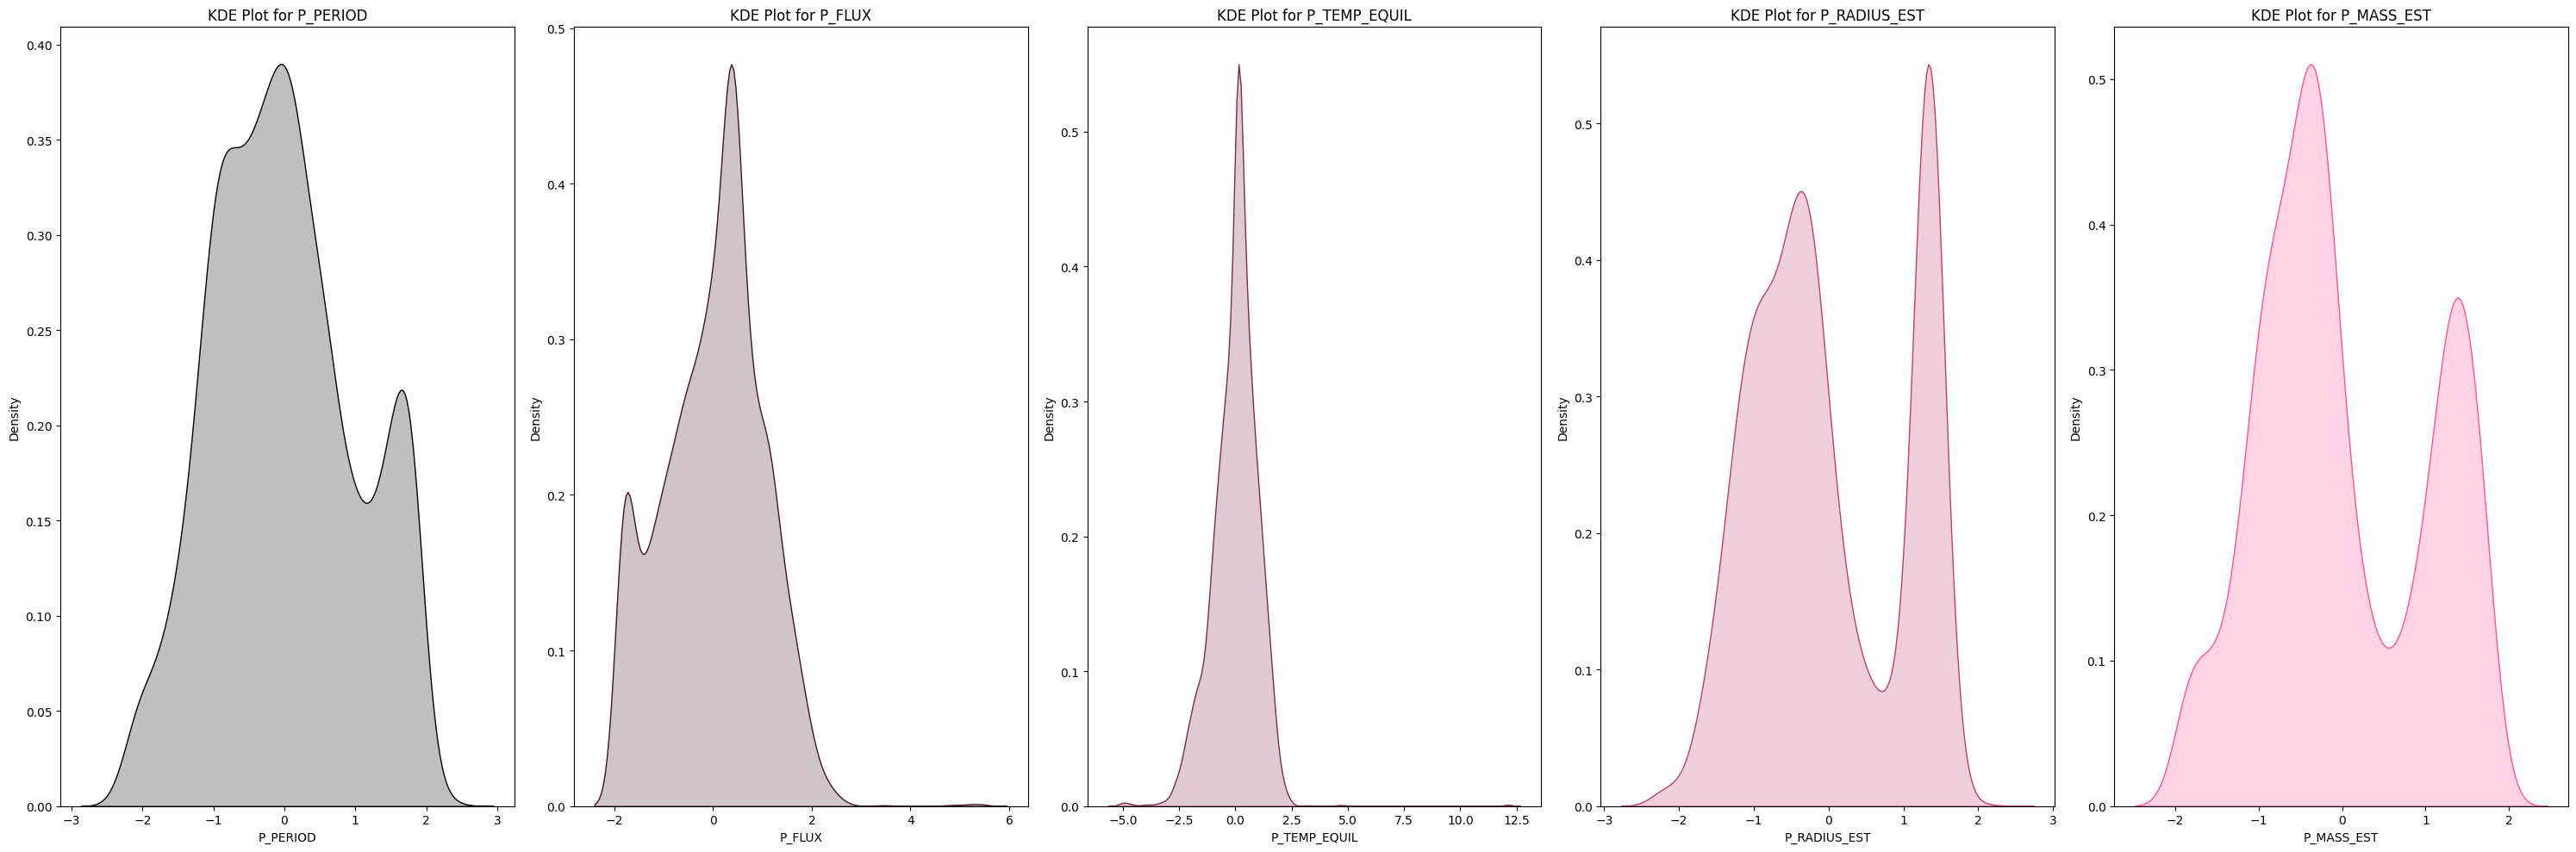

In [ ]:
# distribution plot for different features
fig, axes = plt.subplots(nrows=1, ncols=len(cont_cols), figsize=(30, 10))

# Iterate through each feature and create a KDE plot
for i, feature in enumerate(cont_cols):
    sns.kdeplot(data=feature_mat[feature], ax=axes[i], shade=True, color = (0.25*i, 0.08*i, 0.15*i))
    axes[i].set_title(f'KDE Plot for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
# It is evident that the data is highly skewed
for cols in cont_cols:
    print(f'The skewness of {cols} is {feature_mat[cols].skew()}')

The skewness of P_PERIOD is 0.1614985285494919
The skewness of P_FLUX is -0.005139831252827271
The skewness of P_TEMP_EQUIL is 0.34808102279471503
The skewness of P_RADIUS_EST is 0.1901266644267105
The skewness of P_MASS_EST is 0.24878858059468753


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
rf = RandomForestClassifier()
svc = SVC(probability=True)
xgb = XGBClassifier()
lr = SGDClassifier()
knn = KNeighborsClassifier()
adb = AdaBoostClassifier()
etc = ExtraTreesClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
#mnb = MultinomialNB()

In [ ]:
models = {
    'RF' : rf,
    'SVM' : svc,
    'XGB' : xgb,
    'LR' : lr,
    'KNN' : knn,
    'ADAB' : adb,
    'ETC' : etc,
    'BNB' : bnb,
    'GNB' : gnb
}

In [ ]:
scores = []
for name, model in models.items():
    model.fit(np.array(X), np.array(y))
    y_pred = model.predict(np.array(X_test))
    accuracy = accuracy_score(y_test, y_pred)
    #precision = precision_score(y_test, y_pred)
    scores.append([name, accuracy])

print(scores)

[['RF', 0.9962574850299402], ['SVM', 0.9887724550898204], ['XGB', 0.9977544910179641], ['LR', 0.9618263473053892], ['KNN', 0.9872754491017964], ['ADAB', 0.9977544910179641], ['ETC', 0.999251497005988], ['BNB', 0.9887724550898204], ['GNB', 0.9161676646706587]]


In [ ]:
scores_df= pd.DataFrame(scores, columns=['model_name', 'accuracy'])
scores_df.sort_values('accuracy', ascending= False)

model_name  accuracy
6        ETC  0.999251
2        XGB  0.997754
5       ADAB  0.997754
0         RF  0.996257
1        SVM  0.988772
7        BNB  0.988772
4        KNN  0.987275
3         LR  0.961826
8        GNB  0.916168

In [ ]:
# selecting models ETC, RF, XGB and ADABoost

In [ ]:
best_estimators = {
    'ETC' : etc,
    'RF' : rf,
    'XGB' : xgb,
    'KNN' : knn,
    'ADAB' : adb
}

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Extra Trees Classifier

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 1

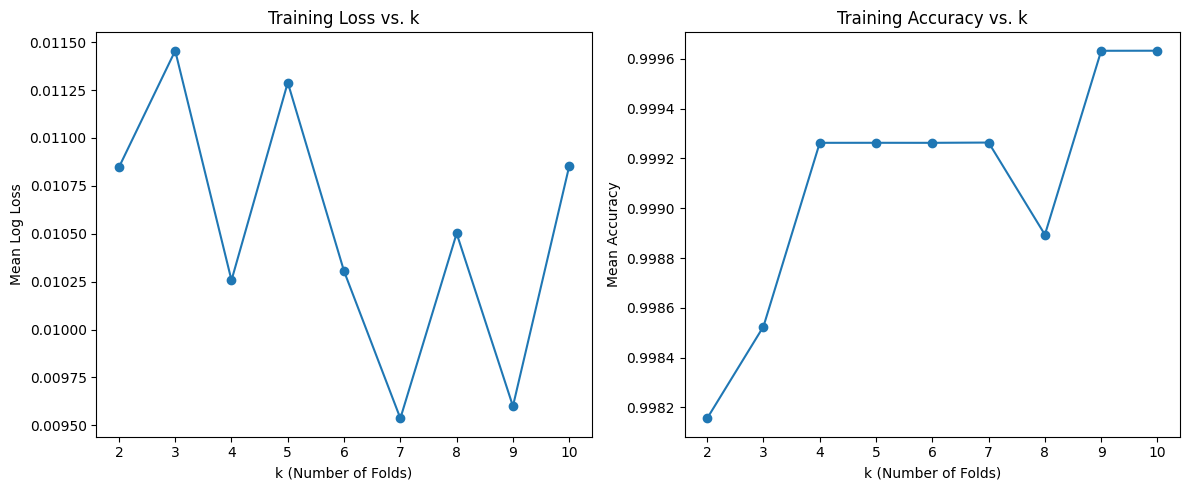

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss


# Load your dataset and split it into features (X) and target labels (y)

# Define a range of k values from 2 to 10
k_values = range(2, 11)

# Create empty lists to store training loss and accuracy for each k
train_losses = []
train_accuracies = []

# Loop through different values of k
for k in k_values:
    # Create a Decision Tree classifier
    #Find the best parameters for Decision Tree using GridSearchCV
    #Hyperparameters' range
    param_grid = {'n_estimators' : [100, 200, 500],
    'min_samples_leaf': [5,10,20],
    'max_features': [2,3,4]
                 }

    #Conduct the Grid Search
    clf = RandomizedSearchCV(estimator = etc,
                                   param_distributions = param_grid,
                                 cv = 10, verbose=1)
    # Use KFold cross-validation
    kf = KFold(n_splits=k)

    # Initialize lists to store loss and accuracy for each fold
    fold_losses = []
    fold_accuracies = []

    # Loop through each fold
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Fit the model on the training data
        clf.fit(X_train, y_train)

        # Predict and calculate loss on the validation data
        y_pred = clf.predict(X_val)
        loss = log_loss(y_val, clf.predict_proba(X_val), labels=np.unique(y))
        accuracy = accuracy_score(y_val, y_pred)

        # Append loss and accuracy for this fold
        fold_losses.append(loss)
        fold_accuracies.append(accuracy)

    # Calculate mean loss and accuracy across all folds
    mean_loss = sum(fold_losses) / k
    mean_accuracy = sum(fold_accuracies) / k

    # Append mean loss and accuracy for this k value
    train_losses.append(mean_loss)
    train_accuracies.append(mean_accuracy)

print("train accuracies: {}".format(np.mean(train_accuracies)))
# Plot loss versus k
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, train_losses, marker='o')
plt.title('Training Loss vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Log Loss')

# Plot accuracy versus k
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracies, marker='o')
plt.title('Training Accuracy vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
# best parameters for Extra Trees Classifier
clf.best_params_

{'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': 3}

In [ ]:
# random Forest classifier

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


 remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

train accuracies: 0.9978290618037887


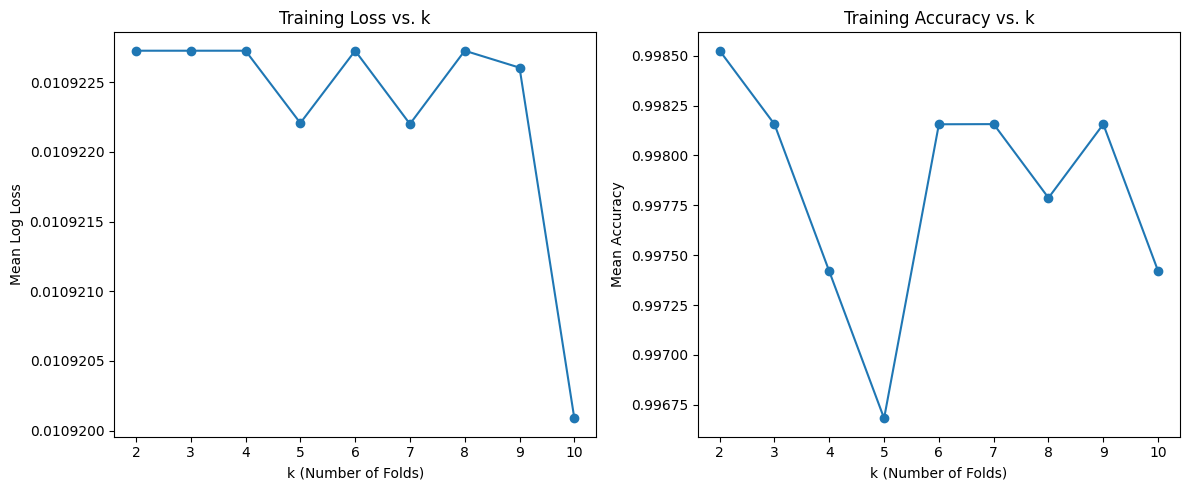

In [ ]:

# Load your dataset and split it into features (X) and target labels (y)

# Define a range of k values from 2 to 10
k_values = range(2, 11)

# Create empty lists to store training loss and accuracy for each k
train_losses = []
train_accuracies = []

# Loop through different values of k
for k in k_values:
    # Create a Decision Tree classifier
    #Find the best parameters for Decision Tree using GridSearchCV
    #Hyperparameters' range
    n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}


    #Conduct the Random Search
    clf1 = RandomizedSearchCV(estimator = rf,
                                   param_distributions = random_grid,
                                   n_iter = 100, cv = 5, verbose=1, random_state=35, n_jobs = -1)

    # Use KFold cross-validation
    kf = KFold(n_splits=k)

    # Initialize lists to store loss and accuracy for each fold
    fold_losses = []
    fold_accuracies = []

    # Loop through each fold
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Fit the model on the training data
        clf1.fit(X_train, y_train)

        # Predict and calculate loss on the validation data
        y_pred = clf1.predict(X_val)
        loss = log_loss(y_val, clf.predict_proba(X_val), labels=np.unique(y))
        accuracy = accuracy_score(y_val, y_pred)

        # Append loss and accuracy for this fold
        fold_losses.append(loss)
        fold_accuracies.append(accuracy)

    # Calculate mean loss and accuracy across all folds
    mean_loss = sum(fold_losses) / k
    mean_accuracy = sum(fold_accuracies) / k

    # Append mean loss and accuracy for this k value
    train_losses.append(mean_loss)
    train_accuracies.append(mean_accuracy)

print("train accuracies: {}".format(np.mean(train_accuracies)))
# Plot loss versus k
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, train_losses, marker='o')
plt.title('Training Loss vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Log Loss')

# Plot accuracy versus k
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracies, marker='o')
plt.title('Training Accuracy vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
clf1.best_params_

{'n_estimators': 4,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [ ]:
# XGBoost

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 5

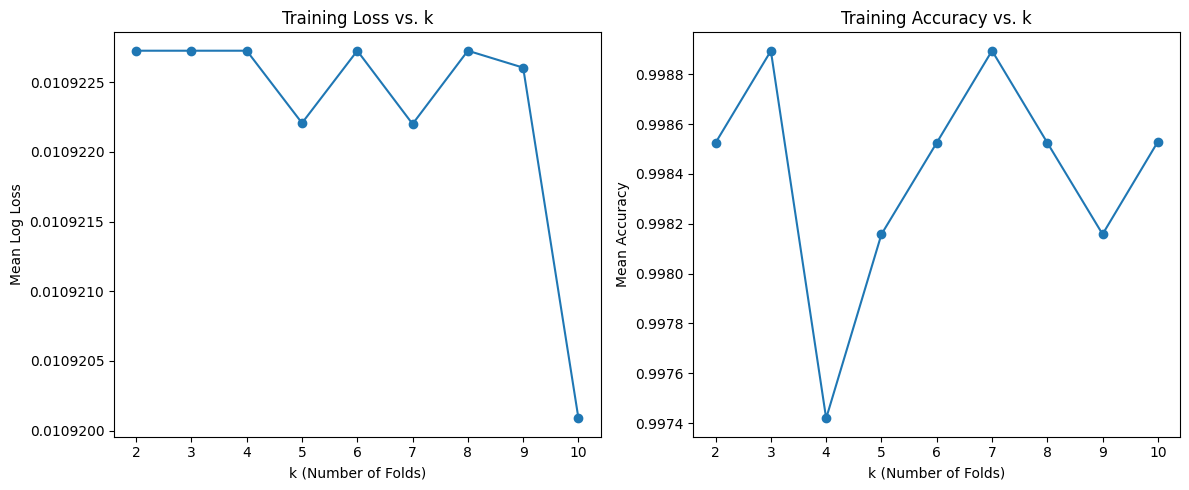

In [ ]:

# Load your dataset and split it into features (X) and target labels (y)

# Define a range of k values from 2 to 10
k_values = range(2, 11)

# Create empty lists to store training loss and accuracy for each k
train_losses = []
train_accuracies = []

# Loop through different values of k
for k in k_values:

    random_grid = {'max_depth': [30, 60, 100, 150],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]}


    #Conduct the Random Search
    clf2 = RandomizedSearchCV(estimator = xgb,
                                   param_distributions = random_grid,
                                   n_iter = 100, cv = 5, verbose=1, random_state=35, n_jobs = -1)

    # Use KFold cross-validation
    kf = KFold(n_splits=k)

    # Initialize lists to store loss and accuracy for each fold
    fold_losses = []
    fold_accuracies = []

    # Loop through each fold
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Fit the model on the training data
        clf2.fit(X_train, y_train)

        # Predict and calculate loss on the validation data
        y_pred = clf2.predict(X_val)
        loss = log_loss(y_val, clf.predict_proba(X_val), labels=np.unique(y))
        accuracy = accuracy_score(y_val, y_pred)

        # Append loss and accuracy for this fold
        fold_losses.append(loss)
        fold_accuracies.append(accuracy)

    # Calculate mean loss and accuracy across all folds
    mean_loss = sum(fold_losses) / k
    mean_accuracy = sum(fold_accuracies) / k

    # Append mean loss and accuracy for this k value
    train_losses.append(mean_loss)
    train_accuracies.append(mean_accuracy)

print("train accuracies: {}".format(np.mean(train_accuracies)))
# Plot loss versus k
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, train_losses, marker='o')
plt.title('Training Loss vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Log Loss')

# Plot accuracy versus k
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracies, marker='o')
plt.title('Training Accuracy vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
clf2.best_params_

{'subsample': 0.7999999999999999,
 'num_class': 10,
 'n_estimators': 500,
 'max_depth': 150,
 'learning_rate': 0.2,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7}

In [ ]:
# K- Nearest neigbours

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 5

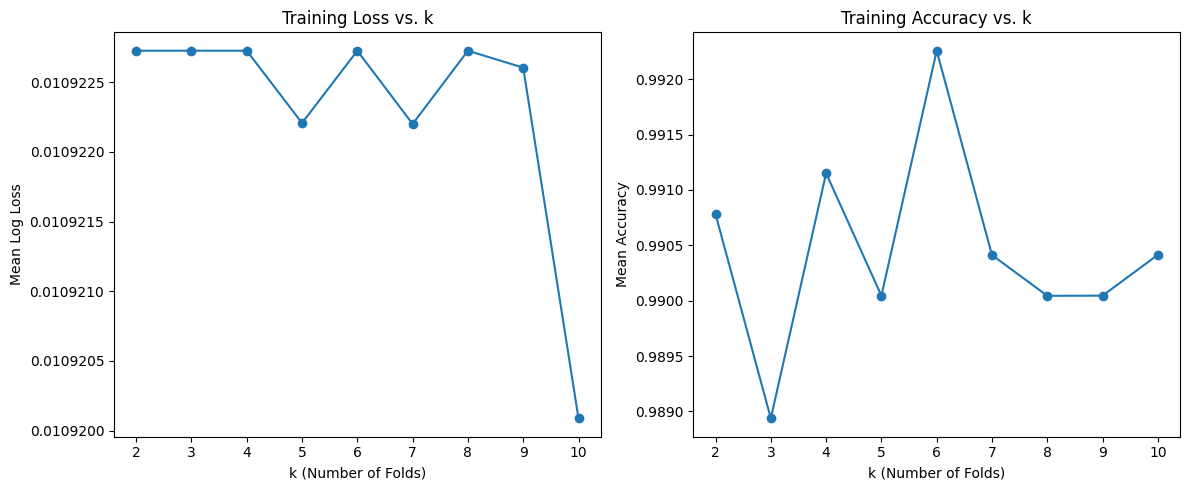

In [ ]:

# Load your dataset and split it into features (X) and target labels (y)

# Define a range of k values from 2 to 10
k_values = range(2, 11)

# Create empty lists to store training loss and accuracy for each k
train_losses = []
train_accuracies = []

# Loop through different values of k
for k in k_values:
    # Create a Decision Tree classifier
    #Find the best parameters for Decision Tree using GridSearchCV
    #Hyperparameters' range
    param_dist = {
    'n_neighbors': list(range(1, 21)),  # Example range for number of neighbors
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan, 2 for Euclidean distance
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(10, 101, 10)),  # Example range for leaf size
    }




    #Conduct the Random Search
    clf3 = RandomizedSearchCV(estimator = knn,
                                   param_distributions = param_dist,
                                   n_iter = 100, cv = 5, verbose=1, random_state=35, n_jobs = -1)

    # Use KFold cross-validation
    kf = KFold(n_splits=k)

    # Initialize lists to store loss and accuracy for each fold
    fold_losses = []
    fold_accuracies = []

    # Loop through each fold
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Fit the model on the training data
        clf3.fit(X_train, y_train)

        # Predict and calculate loss on the validation data
        y_pred = clf3.predict(X_val)
        loss = log_loss(y_val, clf.predict_proba(X_val), labels=np.unique(y))
        accuracy = accuracy_score(y_val, y_pred)

        # Append loss and accuracy for this fold
        fold_losses.append(loss)
        fold_accuracies.append(accuracy)

    # Calculate mean loss and accuracy across all folds
    mean_loss = sum(fold_losses) / k
    mean_accuracy = sum(fold_accuracies) / k

    # Append mean loss and accuracy for this k value
    train_losses.append(mean_loss)
    train_accuracies.append(mean_accuracy)

print("train accuracies: {}".format(np.mean(train_accuracies)))
# Plot loss versus k
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, train_losses, marker='o')
plt.title('Training Loss vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Log Loss')

# Plot accuracy versus k
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracies, marker='o')
plt.title('Training Accuracy vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
clf3.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 7,
 'leaf_size': 30,
 'algorithm': 'auto'}

In [ ]:
# AdaBoost

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits
train accuracies: 0.997787366570274


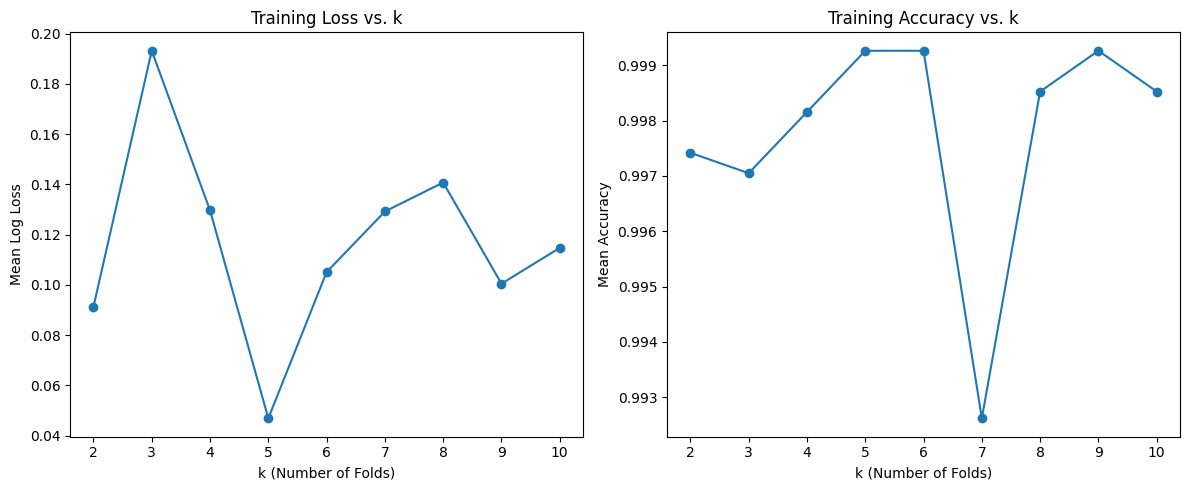

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss


# Load your dataset and split it into features (X) and target labels (y)

# Define a range of k values from 2 to 10
k_values = range(2, 11)

# Create empty lists to store training loss and accuracy for each k
train_losses = []
train_accuracies = []

# Loop through different values of k
for k in k_values:
    # Create a Decision Tree classifier
    #Find the best parameters for Decision Tree using GridSearchCV
    #Hyperparameters' range
    n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}


    #Conduct the Random Search
    clf4 = RandomizedSearchCV(estimator = adb,
                                   param_distributions = random_grid,
                                   n_iter = 100, cv = 5, verbose=1, random_state=35, n_jobs = -1)

    # Use KFold cross-validation
    kf = KFold(n_splits=k)

    # Initialize lists to store loss and accuracy for each fold
    fold_losses = []
    fold_accuracies = []

    # Loop through each fold
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Fit the model on the training data
        clf4.fit(X_train, y_train)

        # Predict and calculate loss on the validation data
        y_pred = clf4.predict(X_val)
        loss = log_loss(y_val, clf4.predict_proba(X_val), labels=np.unique(y))
        accuracy = accuracy_score(y_val, y_pred)

        # Append loss and accuracy for this fold
        fold_losses.append(loss)
        fold_accuracies.append(accuracy)

    # Calculate mean loss and accuracy across all folds
    mean_loss = sum(fold_losses) / k
    mean_accuracy = sum(fold_accuracies) / k

    # Append mean loss and accuracy for this k value
    train_losses.append(mean_loss)
    train_accuracies.append(mean_accuracy)

print("train accuracies: {}".format(np.mean(train_accuracies)))
# Plot loss versus k
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, train_losses, marker='o')
plt.title('Training Loss vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Log Loss')

# Plot accuracy versus k
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracies, marker='o')
plt.title('Training Accuracy vs. k')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Mean Accuracy')

plt.tight_layout()
plt.show()


# final predictions on the test data

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import binarize

In [ ]:
model_etc = ExtraTreesClassifier(**clf.best_params_)
model_etc.fit(X_train, y_train)
y_pred_etc = model_etc.predict(X_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


The accuracy of Extra Trees Classifier on Test Data is  0.999251497005988
The precision score of Extra Trees Classifier on Test Data is  [1.         1.         0.88888889]
The recall score of Extra Trees Classifier on Test Data is  [1.         0.85714286 1.        ]
The f1_score of Extra Trees Classifier on Test Data is  [1.         0.92307692 0.94117647]


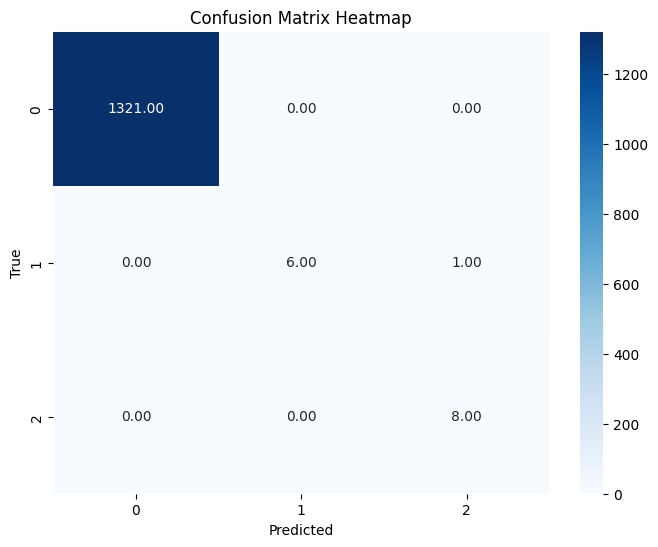

In [ ]:
print('The accuracy of Extra Trees Classifier on Test Data is ', accuracy_score(y_test, y_pred_etc))
print('The precision score of Extra Trees Classifier on Test Data is ', precision_score(y_test, y_pred_etc, average = None))
print('The recall score of Extra Trees Classifier on Test Data is ', recall_score(y_test, y_pred_etc, average = None))
print('The f1_score of Extra Trees Classifier on Test Data is ', f1_score(y_test, y_pred_etc, average= None))

confusion_mat = confusion_matrix(y_test, y_pred_etc)

unique_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt=".2f", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Random Forest

In [ ]:
model_rf = RandomForestClassifier(**clf1.best_params_)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


The accuracy of random Forest Classifier on Test Data is  0.9962574850299402
The precision score of random Forest on Test Data is  [0.999243   1.         0.63636364]
The recall score of random Forest on Test Data is  [0.999243   0.57142857 0.875     ]
The f1_score of random Forest on Test Data is  [0.999243   0.72727273 0.73684211]


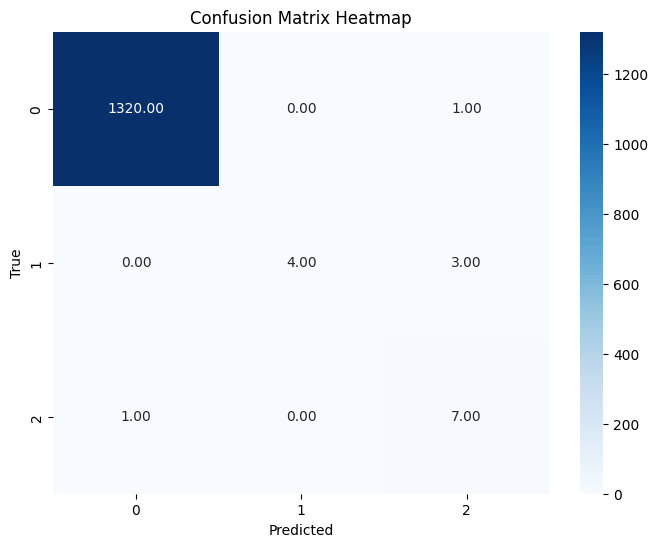

In [ ]:
print('The accuracy of random Forest Classifier on Test Data is ', accuracy_score(y_test, y_pred_rf))
print('The precision score of random Forest on Test Data is ', precision_score(y_test, y_pred_rf, average = None))
print('The recall score of random Forest on Test Data is ', recall_score(y_test, y_pred_rf, average = None))
print('The f1_score of random Forest on Test Data is ', f1_score(y_test, y_pred_rf, average= None))

confusion_mat = confusion_matrix(y_test, y_pred_rf)

unique_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt=".2f", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# XGBoost

In [ ]:
model_xgb = XGBClassifier(**clf2.best_params_)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

The accuracy of XGBoost Classifier on Test Data is  0.9977544910179641
The precision score of XGBoost on Test Data is  [0.99924357 1.         0.8       ]
The recall score of XGBoost on Test Data is  [1.         0.57142857 1.        ]
The f1_score of XGBoost on Test Data is  [0.99962164 0.72727273 0.88888889]


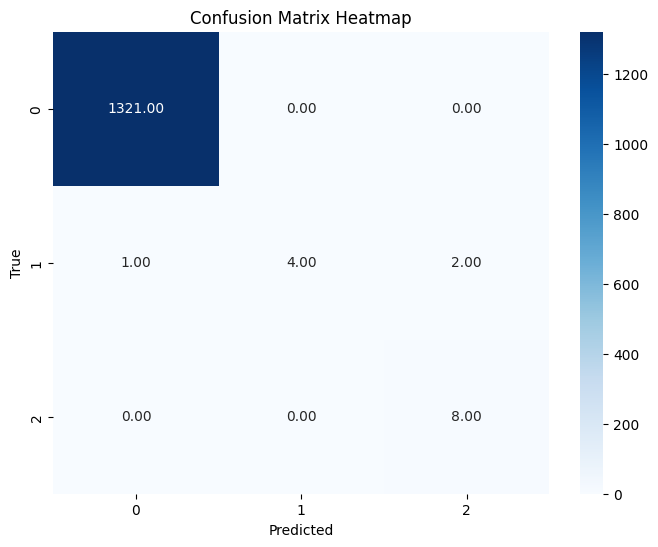

In [ ]:
print('The accuracy of XGBoost Classifier on Test Data is ', accuracy_score(y_test, y_pred_xgb))
print('The precision score of XGBoost on Test Data is ', precision_score(y_test, y_pred_xgb, average = None))
print('The recall score of XGBoost on Test Data is ', recall_score(y_test, y_pred_xgb, average = None))
print('The f1_score of XGBoost on Test Data is ', f1_score(y_test, y_pred_xgb, average= None))

confusion_mat = confusion_matrix(y_test, y_pred_xgb)

unique_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt=".2f", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# knn

In [ ]:
model_knn = KNeighborsClassifier(**clf3.best_params_)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


The accuracy of KNN Classifier on Test Data is  0.9895209580838323
The precision score of KNN on Test Data is  [0.9977221  0.66666667 0.375     ]
The recall score of KNN on Test Data is  [0.99470098 0.28571429 0.75      ]
The f1_score of KNN on Test Data is  [0.99620925 0.4        0.5       ]


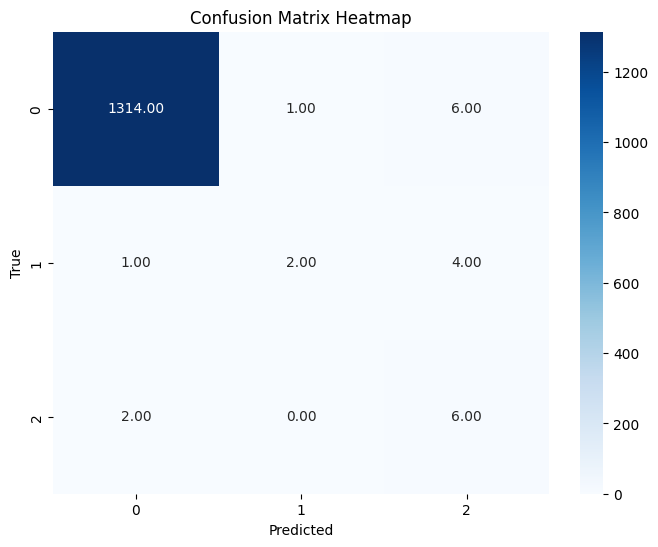

In [ ]:
print('The accuracy of KNN Classifier on Test Data is ', accuracy_score(y_test, y_pred_knn))
print('The precision score of KNN on Test Data is ', precision_score(y_test, y_pred_knn, average = None))
print('The recall score of KNN on Test Data is ', recall_score(y_test, y_pred_knn, average = None))
print('The f1_score of KNN on Test Data is ', f1_score(y_test, y_pred_knn, average= None))

confusion_mat = confusion_matrix(y_test, y_pred_knn)

unique_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt=".2f", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# adaboost

In [ ]:
model_adb = AdaBoostClassifier(**clf4.best_params_)
model_adb.fit(X_train, y_train)
y_pred_adb = model_adb.predict(X_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


The accuracy of AdaBoost Classifier on Test Data is  0.9977544910179641
The precision score of AdaBoost on Test Data is  [1.         1.         0.72727273]
The recall score of AdaBoost on Test Data is  [1.         0.57142857 1.        ]
The f1_score of AdaBoost on Test Data is  [1.         0.72727273 0.84210526]


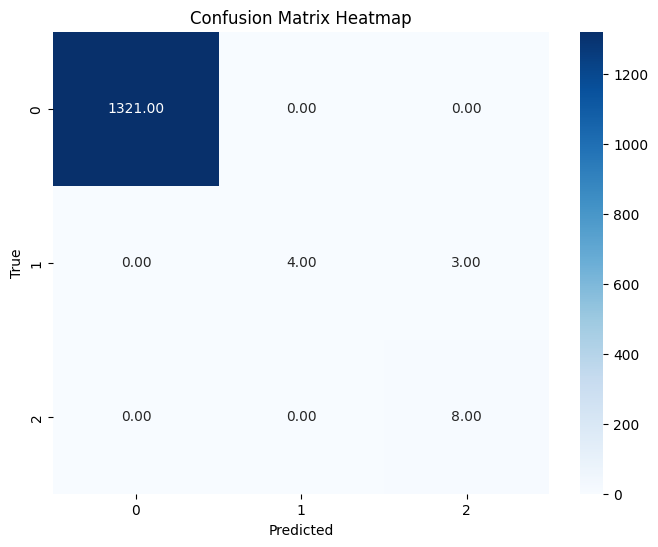

In [ ]:
print('The accuracy of AdaBoost Classifier on Test Data is ', accuracy_score(y_test, y_pred_adb))
print('The precision score of AdaBoost on Test Data is ', precision_score(y_test, y_pred_adb, average = None))
print('The recall score of AdaBoost on Test Data is ', recall_score(y_test, y_pred_adb, average = None))
print('The f1_score of AdaBoost on Test Data is ', f1_score(y_test, y_pred_adb, average= None))

confusion_mat = confusion_matrix(y_test, y_pred_adb)

unique_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt=".2f", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

##

In [ ]:
final_predictions = {
    'accuracy' : [accuracy_score(y_test, y_pred_etc), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_adb)],
    'weighted_precision' : [precision_score(y_test, y_pred_etc, average = 'weighted'), precision_score(y_test, y_pred_rf, average = 'weighted'), precision_score(y_test, y_pred_xgb, average = 'weighted'), precision_score(y_test, y_pred_knn, average = 'weighted'), precision_score(y_test, y_pred_adb, average = 'weighted')],
    'weighted_recall' : [recall_score(y_test, y_pred_etc, average = 'weighted'), recall_score(y_test, y_pred_rf, average = 'weighted'), recall_score(y_test, y_pred_xgb, average = 'weighted'), recall_score(y_test, y_pred_knn, average = 'weighted'), recall_score(y_test, y_pred_adb, average = 'weighted')],
    'weighted_f1_score' : [f1_score(y_test, y_pred_etc, average = 'weighted'), f1_score(y_test, y_pred_rf, average = 'weighted'), f1_score(y_test, y_pred_xgb, average = 'weighted'),f1_score(y_test, y_pred_knn, average = 'weighted'), f1_score(y_test, y_pred_adb, average = 'weighted')],
}

In [ ]:
final_predictions_df = pd.DataFrame(final_predictions)
final_predictions_df = final_predictions_df.T
columns = ['ExtraTreesClassifier', 'RandomForest', 'XGBoost', 'KNN', 'AdaBoost']
final_predictions_df.columns = columns

In [ ]:
final_predictions_df

ExtraTreesClassifier  RandomForest   XGBoost       KNN   
accuracy                        0.999251      0.996257  0.997754  0.989521  \
weighted_precision              0.999335      0.997074  0.998054  0.992259   
weighted_recall                 0.999251      0.996257  0.997754  0.989521   
weighted_f1_score               0.999245      0.996247  0.997532  0.990114   

                    AdaBoost  
accuracy            0.997754  
weighted_precision  0.998367  
weighted_recall     0.997754  
weighted_f1_score   0.997626

## Hence the best predictor we get is ExtraTrees Classifier

### RandomisedSearchCV was used to find the best optimal hyperparamters for the model which came out to be as follows:

#### {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': 3}